In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv('/Users/abirami/Documents/DATA SCIENCE INTERNSHIP/Dataset .csv')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


NUMBER OF ROWS AND COLUMNS

In [4]:
data.shape

(9551, 21)

In [5]:
data.describe

<bound method NDFrame.describe of       Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanb

DATA CLEANING

In [6]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
num_var=['Restaurant ID','Country Code','Longitude','Latitude','Average Cost for two','Currency','Price range','Aggregate rating','Votes']
print('zero count:\n')
for i in num_var:
    zero_count=(data[i]==0).sum()
    print(i,':',zero_count)

zero count:

Restaurant ID : 0
Country Code : 0
Longitude : 498
Latitude : 498
Average Cost for two : 18
Currency : 0
Price range : 0
Aggregate rating : 2148
Votes : 1094


In [8]:
change_var=['Longitude','Latitude','Average Cost for two']
for j in change_var:
    data[j]=data[j].replace(0,np.nan)

In [9]:
num_var2=['Longitude','Latitude','Average Cost for two']
print('zero count:\n')
for i in num_var2:
    zero_count=(data[i]==0).sum()
    print(i,':',zero_count)

zero count:

Longitude : 0
Latitude : 0
Average Cost for two : 0


In [10]:
data.isnull().sum()

Restaurant ID             0
Restaurant Name           0
Country Code              0
City                      0
Address                   0
Locality                  0
Locality Verbose          0
Longitude               498
Latitude                498
Cuisines                  9
Average Cost for two     18
Currency                  0
Has Table booking         0
Has Online delivery       0
Is delivering now         0
Switch to order menu      0
Price range               0
Aggregate rating          0
Rating color              0
Rating text               0
Votes                     0
dtype: int64

In [11]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
data[['Latitude', 'Longitude']] = knn_imputer.fit_transform(data[['Latitude', 'Longitude']])

In [12]:
data.dropna(subset=['Average Cost for two'],inplace=True)
data.dropna(subset=['Cuisines'],inplace=True)

In [14]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

DISTRIBUTION OF AGGREGATE RATING

<Axes: xlabel='Aggregate rating', ylabel='Count'>

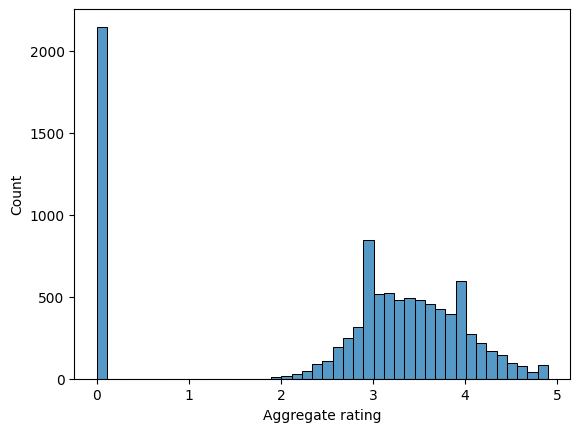

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Aggregate rating'])

CLASS IMBALANCE

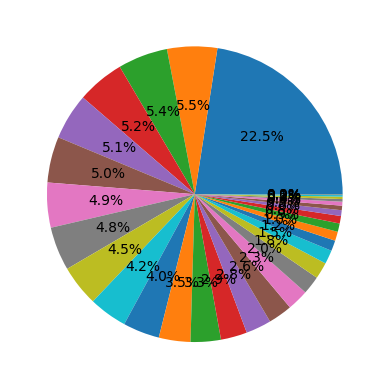

In [16]:
plt.pie(data['Aggregate rating'].value_counts(),autopct='%1.1f%%')
plt.show()

STATISTICAL MEASURES

In [17]:
num_stats=['Longitude','Latitude','Average Cost for two','Price range','Aggregate rating','Votes']
for x in num_stats:
    print(x,' mean:',data[x].mean())
    print(x,' median:',data[x].median())
    print(x,' mode:',data[x].mode())
    print(x,' standard deviation:',data[x].std())
    print(x,' variance:',data[x].var())
    print('\n')

Longitude  mean: 67.88428026017829
Longitude  median: 77.1920352
Longitude  mode: 0    67.654138
Name: Longitude, dtype: float64
Longitude  standard deviation: 38.175280891161975
Longitude  variance: 1457.3520711191168


Latitude  mean: 27.25781906995318
Latitude  median: 28.57044385
Latitude  mode: 0    27.276614
Name: Latitude, dtype: float64
Latitude  standard deviation: 9.216873274809286
Latitude  variance: 84.95075296389365


Average Cost for two  mean: 1202.2160176340926
Average Cost for two  median: 400.0
Average Cost for two  mode: 0    500.0
Name: Average Cost for two, dtype: float64
Average Cost for two  standard deviation: 16141.3669589645
Average Cost for two  variance: 260543727.30395088


Price range  mean: 1.806234911304713
Price range  median: 2.0
Price range  mode: 0    1
Name: Price range, dtype: int64
Price range  standard deviation: 0.9057117867593627
Price range  variance: 0.8203138406748374


Aggregate rating  mean: 2.663398761414926
Aggregate rating  median: 3.2


DISTRIBUTION OF COUNTRY CODE,CITY AND CUISINES

In [18]:
print('Country Code distribution:\n',data['Country Code'].value_counts,'\n')
print('City distribution:\n',data['City'].value_counts,'\n')
print('Cuisines distribution:\n',data['Cuisines'].value_counts)

Country Code distribution:
 <bound method IndexOpsMixin.value_counts of 0       162
1       162
2       162
3       162
4       162
       ... 
9546    208
9547    208
9548    208
9549    208
9550    208
Name: Country Code, Length: 9527, dtype: int64> 

City distribution:
 <bound method IndexOpsMixin.value_counts of 0            Makati City
1            Makati City
2       Mandaluyong City
3       Mandaluyong City
4       Mandaluyong City
              ...       
9546           ��stanbul
9547           ��stanbul
9548           ��stanbul
9549           ��stanbul
9550           ��stanbul
Name: City, Length: 9527, dtype: object> 

Cuisines distribution:
 <bound method IndexOpsMixin.value_counts of 0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     

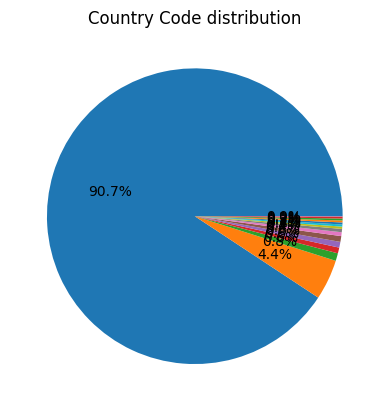

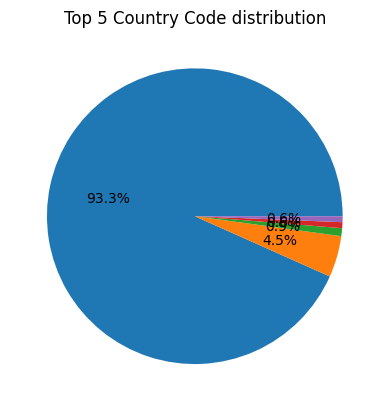

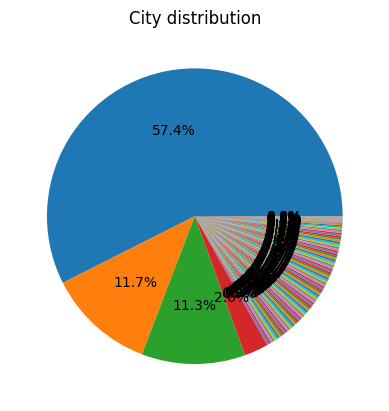

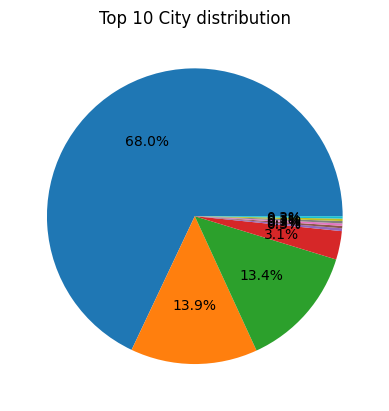

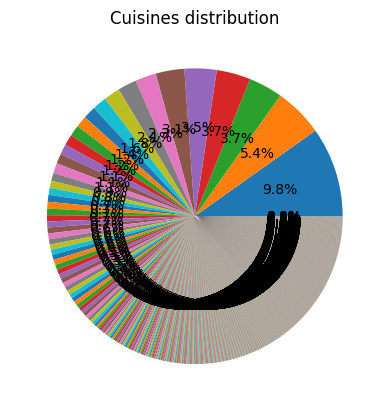

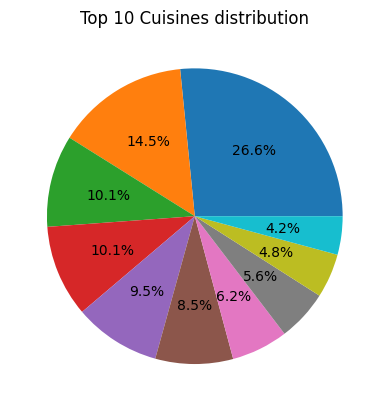

In [28]:
plt.pie(data['Country Code'].value_counts(),autopct='%1.1f%%')
plt.title('Country Code distribution')
plt.show()
plt.pie(data['Country Code'].value_counts().sort_values(ascending=False).head(5),autopct='%1.1f%%')
plt.title('Top 5 Country Code distribution')
plt.show()

plt.pie(data['City'].value_counts(),autopct='%1.1f%%')
plt.title('City distribution')
plt.show()
plt.pie(data['City'].value_counts().sort_values(ascending=False).head(10),autopct='%1.1f%%')
plt.title('Top 10 City distribution')
plt.show()

plt.pie(data['Cuisines'].value_counts(),autopct='%1.1f%%')
plt.title('Cuisines distribution')
plt.show()
plt.pie(data['Cuisines'].value_counts().sort_values(ascending=False).head(10),autopct='%1.1f%%')
plt.title('Top 10 Cuisines distribution')
plt.show()

TOP CUISINES AND CITIES WITH HIGHEST NUMBER OF RESTAURANTS

Top 10 Cities with highest number of Restaurants:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Guwahati          21
Ahmedabad         21
Bhubaneshwar      21
Amritsar          21
Lucknow           21
Name: count, dtype: int64


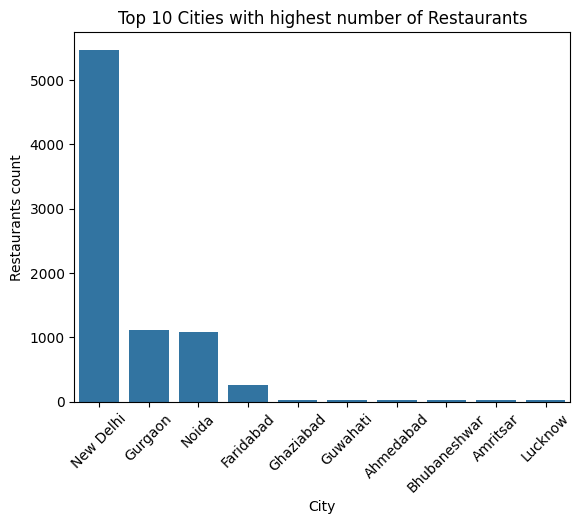

In [77]:
top_city=data['City'].value_counts().head(10)
print('Top 10 Cities with highest number of Restaurants:\n',top_city)

sns.barplot(x=top_city.index,y=top_city.values)
plt.xlabel('City')
plt.ylabel('Restaurants count')
plt.title('Top 10 Cities with highest number of Restaurants')
plt.xticks(rotation=45)
plt.show()

Top 10 Cuisines given by Restaurants across various cities:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       148
Name: count, dtype: int64


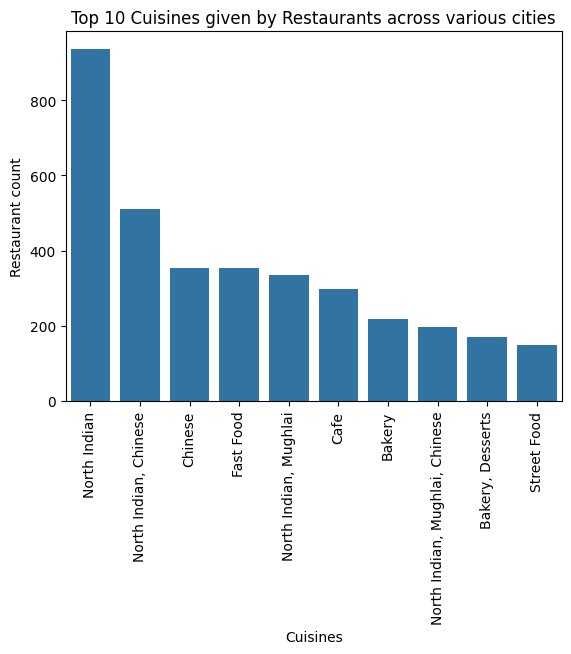

In [78]:
top_cuisines=data['Cuisines'].value_counts().head(10)
print('Top 10 Cuisines given by Restaurants across various cities:\n',top_cuisines)

sns.barplot(x=top_cuisines.index,y=top_cuisines.values)
plt.xlabel('Cuisines')
plt.ylabel('Restaurant count')
plt.title('Top 10 Cuisines given by Restaurants across various cities')
plt.xticks(rotation=90)
plt.show()

LOCATION OF RESTAURANTS

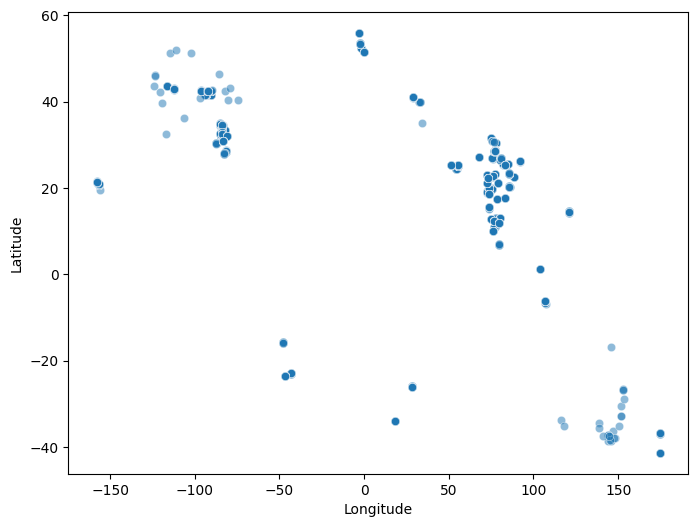

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Longitude',y='Latitude',alpha=0.5,legend=False)
plt.show()

DISTRIBUTION OF RESTAURANTS ACROSS VARIOUS CITIES

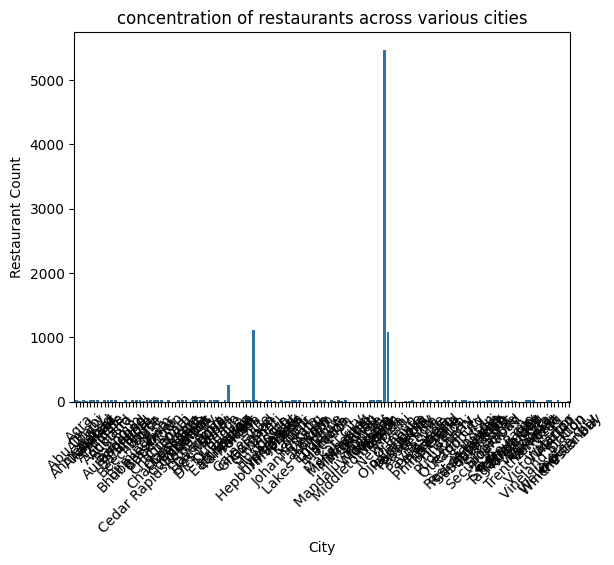

In [80]:
con_res=data.groupby('City').size().reset_index(name='Restaurants')

sns.barplot(data=con_res,x='City',y='Restaurants')
plt.xlabel('City')
plt.ylabel('Restaurant Count')
plt.title('concentration of restaurants across various cities')
plt.xticks(rotation=45)
plt.show()

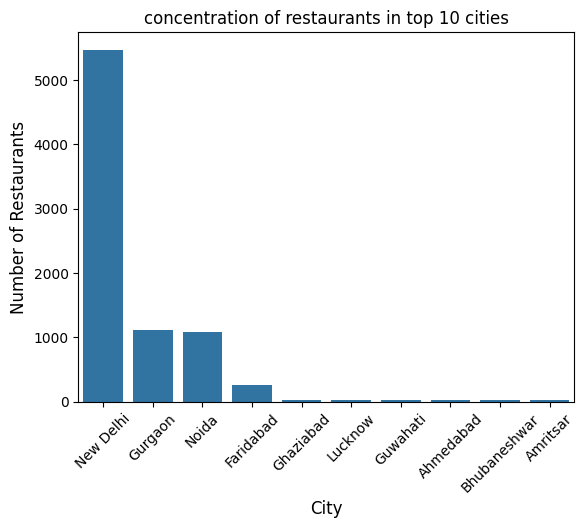

In [81]:
con_res = con_res.sort_values(by='Restaurants', ascending=False)

sns.barplot(data=con_res.head(10), x='City', y='Restaurants')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.title('concentration of restaurants in top 10 cities')
plt.xticks(rotation=45)
plt.show()


CORRELATION BETWEEN RESTAURANT RATINGS AND LOCATION

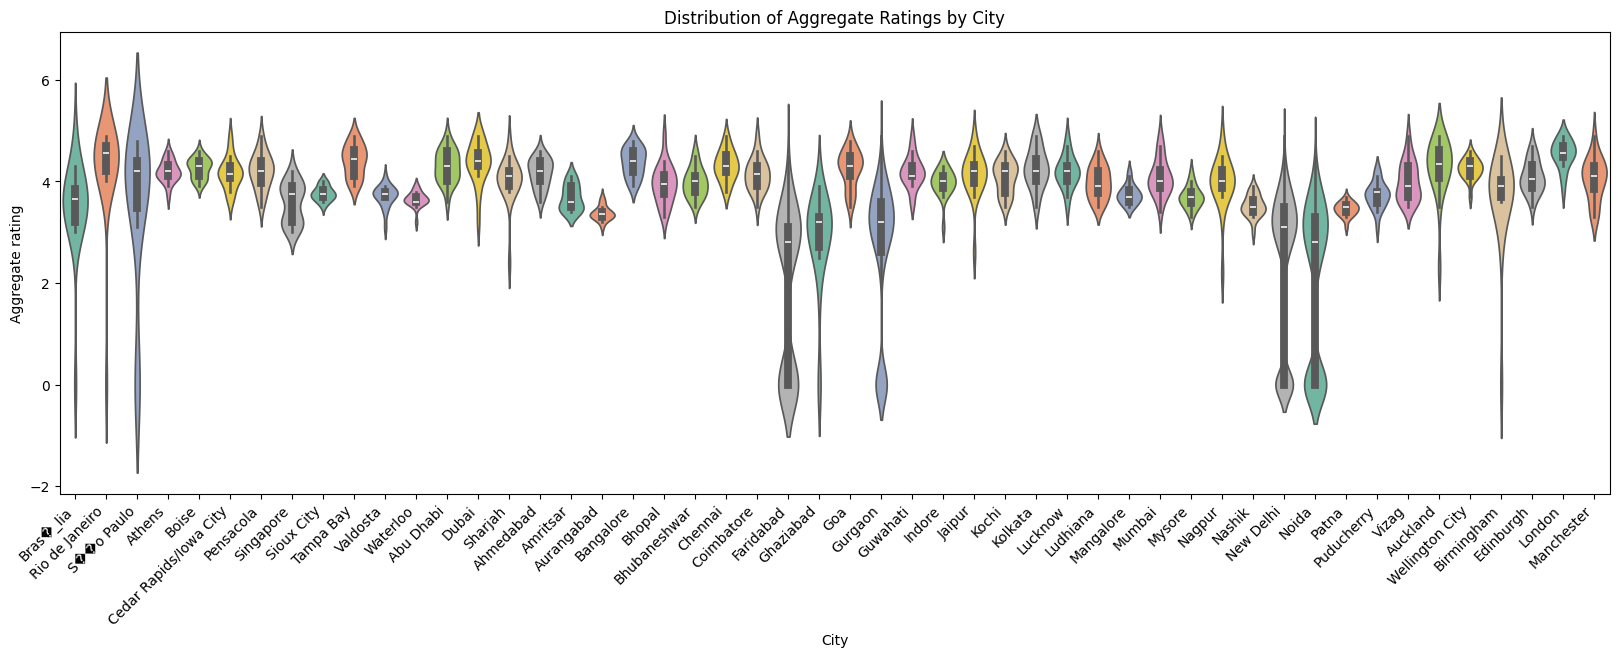

In [82]:
top_cities = data['City'].value_counts().head(50).index
filtered_data = data[data['City'].isin(top_cities)]

plt.figure(figsize=(20, 6))
sns.violinplot(x='City', y='Aggregate rating', data=filtered_data, palette='Set2')
plt.title('Distribution of Aggregate Ratings by City')
plt.xticks(rotation=45, ha='right')
plt.show()


In [83]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
data['City_encoded']=label_encoder.fit_transform(data['City'])
correlation=data[['City_encoded', 'Aggregate rating']].corr()
print("Correlation between City and Rating:", correlation.iloc[0, 1])

Correlation between City and Rating: -0.12968804792470828


The features City and Aggregate ratings do not strongly influence each other.